In [75]:
import os
import pandas as pd
import numpy as np
import string
import nltk


In [76]:
t1 = pd.read_csv("/content/GMT20200710-180308_Conrad-s-P.transcript (1).txt", delimiter = ':',skiprows= 1, names = ['Speaker', 'Line'])
t1 = t1.iloc[2::3, :].dropna()
t1.head(10)

,Speaker,Line
2,Conrad,Hello. Can you hear me.
5,Maria Calderon,"Yes, I can hear you fine."
8,Conrad,Thank you for being patient
14,Conrad,"You're just receiving a few more people, and ..."
17,Conrad,Can you hear me.
20,Luisa,"Yes, I can."
23,Conrad,"Okay, great. Thank you for being patient. I'l..."
26,Conrad,"Oh, you need to unmute yourself, I think, bot..."
29,Sonia,"All right, I know that. Hi there."
32,Conrad,"Hi there. Hey, how's it going, Okay. Great. G..."


In [77]:
import re as r

df = pd.read_csv("/content/GMT20200710-180308_Conrad-s-P.transcript (1).txt", sep="\n", encoding='latin 1', dtype = str, keep_default_na=False, converters={'some_name':lambda x:x.replace('/n','')})
#df = df.groupby(df.index // 4).agg(' '.join)
df = pd.DataFrame(df.values.reshape(-1, 3), 
                    columns=['line','Timestamp','Text'])
df[['Speaker', "Text"]]= df['Text'].str.split(":",expand=True)
df[['Start', "End"]]= df['Timestamp'].str.split("-->",expand=True)
df = df[["line", "Text", "Speaker", "Start", "End"]]
df.head(30)
#wonky_parser("/content/GMT20200710-180308_Conrad-s-P.transcript (1).txt")

,line,Text,Speaker,Start,End
0,1,Hello. Can you hear me.,Conrad,00:00:15.570,00:00:17.400
1,2,"Yes, I can hear you fine.",Maria Calderon,00:00:18.240,00:00:19.680
2,3,Thank you for being patient,Conrad,00:00:20.460,00:00:22.140
3,4,None,Yes.,00:00:22.350,00:00:22.890
4,5,"You're just receiving a few more people, and ...",Conrad,00:00:26.850,00:00:34.530
5,6,Can you hear me.,Conrad,00:00:35.880,00:00:36.690
6,7,"Yes, I can.",Luisa,00:00:37.170,00:00:38.130
7,8,"Okay, great. Thank you for being patient. I'l...",Conrad,00:00:38.490,00:00:45.840
8,9,"Oh, you need to unmute yourself, I think, bot...",Conrad,00:00:47.730,00:00:51.300
9,10,"All right, I know that. Hi there.",Sonia,00:00:52.920,00:00:54.390


In [78]:
# Select Speaker
participant = 'Conrad'

#Filter
df = df.loc[df['Speaker'] == participant]

df.head()

,line,Text,Speaker,Start,End
0,1,Hello. Can you hear me.,Conrad,00:00:15.570,00:00:17.400
2,3,Thank you for being patient,Conrad,00:00:20.460,00:00:22.140
4,5,"You're just receiving a few more people, and ...",Conrad,00:00:26.850,00:00:34.530
5,6,Can you hear me.,Conrad,00:00:35.880,00:00:36.690
7,8,"Okay, great. Thank you for being patient. I'l...",Conrad,00:00:38.490,00:00:45.840


In [79]:
#Text Prep
def my_tokenizer(text):
  return text.split() if text != None else []

#Test Cleaning removeing the cases and punctuation
t1.Line = t1.Line.str.replace('[^\w\s]','')
t1.Line = t1.Line.str.lower()

#Tokenize each word
tokens = t1.Line.map(my_tokenizer).sum()
#t2 = t1.Line.map(my_tokenizer).sum()

In [80]:
from collections import Counter
counter = Counter(tokens)
counter = counter.most_common(200)

In [81]:
from spacy.lang.en.stop_words import STOP_WORDS
# Remove stop words from each tweet list of words
collection_words = ['okay', 'guys', 'um', 'im']
def remove_stopwords(tokens):
  t = [t for t in tokens if t not in collection_words]
  return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens)).most_common(200)
#counter

In [82]:
counts = pd.DataFrame(counter,
                             columns=['words', 'count'])

counts.head()

,words,count
0,okay,51
1,guys,49
2,great,33
3,right,27
4,going,26


In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

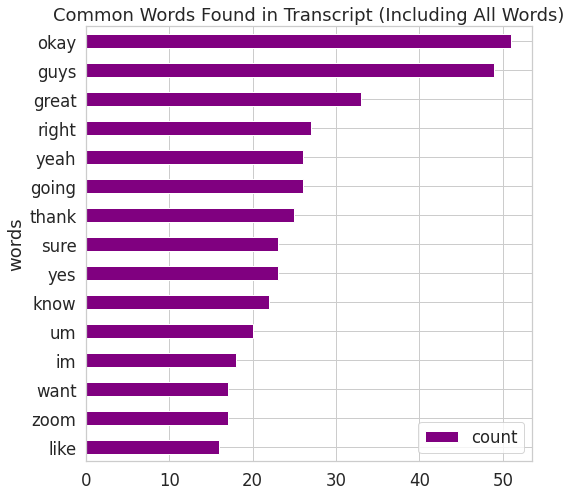

In [84]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
c = counts.head(15)
# Plot horizontal bar graph
c.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Transcript (Including All Words)")

plt.show()

In [88]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
import re
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [89]:

t1["polarity"] = t1['Line'].apply(lambda x: TextBlob(x).sentiment.polarity)
t1.head()

pro_sent_df = t1[t1.polarity != 0].copy()
pro_sent_df = pro_sent_df[["Line", "polarity"]].copy()

fig, ax = plt.subplots(figsize=(8, 6))

pro_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1], ax=ax, color="purple")

plt.title("Sentiments from Tweets on the Transcripts")
plt.show()

NameError: ignored

In [71]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tokens)) for t in tokens]

# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

#bigram_counts.most_common(20)

bigram_counts.filter(lambda x: x[0].startswith('great'), l)

NameError: ignored

In [87]:
terms_bigram = [list(bigrams(tokens)) for t in tokens]
terms_bigram

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(20)

In [188]:
#TextBlob(t1.Line)
bigrm = nltk.bigrams(remove_stopwords(tokens))
bigrm #= map(' '.join, bigrm), sep=', ')


<generator object bigrams at 0x7f16a304bc50>

In [191]:
#TextBlob(t1.Line)
bigrm = nltk.bigrams(remove_stopwords(tokens))
#bigrm = map(' '.join, bigrm), sep=', ')

# Put the words into a list
words = list(t1['Line'])
words_in_tweet = [tweet.lower().split() for tweet in words]

# Remove the stops and search words
tweets_nsw = [[word for word in words_in_tweet if not word in STOP_WORDS]for words_in_tweet in words_in_tweet]
collection_words = ['vaccines', 'vaccine', 'work', 'vaccinate', 'vaccination', 'rt', 'vaccineswork', 
                    'gatesfoundation', 'unicef',  'via', 'new', 'get', 'countries', 'year']



In [ ]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(you, guys)",192240
1,"(if, you)",124155
2,"(thank, you)",100125
3,"(okay, great)",92115
4,"(going, to)",88110
5,"(make, sure)",80100
6,"(all, right)",72090
7,"(you, can)",64080
8,"(want, to)",56070
9,"(i, just)",56070


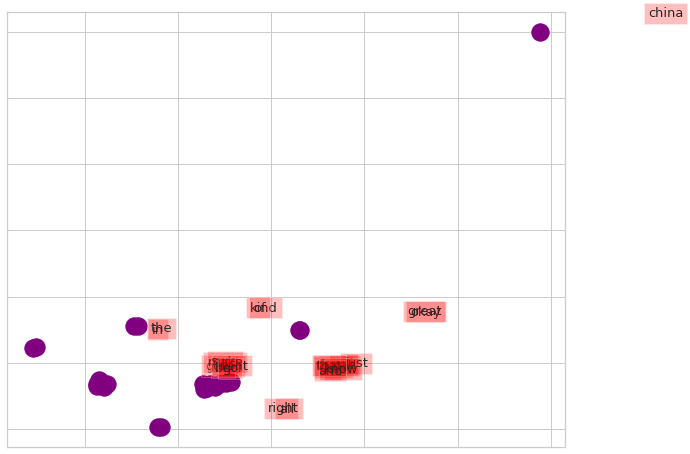

In [183]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=1)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

In [ ]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(t1) for Line in t1]

sentiment_objects[0].polarity, sentiment_objects[0]

In [ ]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]

In [ ]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.to_csv('C:\\Users\\conra\Documents\\IST 718\\sentiment.csv', sep = ',')
sentiment_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Vaccines")
plt.show()

In [ ]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.polarity != 0]
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Vaccines")
plt.show()

In [ ]:
search_term = "#VaccinesWork -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2018-09-23').items(1000)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]


In [ ]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.to_csv('C:\\Users\\conra\Documents\\IST 718\\Vaccines_Work_sentiment.csv', sep = ',')

wild_sent_df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the #VaccinesWork")
plt.show()